# Clasificación con Red Neuronal Profunda - Ejemplo

En este ejemplo se aplicará una red neuronal profunda en [TensorFlow](https://www.tensorflow.org/) (en particular, [Keras](https://www.tensorflow.org/api_docs/python/tf/keras/)) para clasificar las prendas de vestir del set datos [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist).

<img src="https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png" alt="Fashion-MNIST sample" width="600"/>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from tensorflow import keras

In [ ]:
# Definamos el "random_state" para que los resultados sean reproducibles:
random_state=24

In [ ]:
# Cambiemos la fuente de las gráficas de matplotlib:
plt.rc('font', family='serif', size=12)

## Preprocesamiento de datos

Obtengamos las caracterísitcas y las etiquetas desde [OpenML](https://www.openml.org/d/40996):

In [ ]:
X, y = fetch_openml(
    'Fashion-MNIST',
    version='active',
    return_X_y=True,
    as_frame=False
)

In [ ]:
# Las etiquetas están almacenadas como texto. Convirtámoslas en numéricas:
y = y.astype('int8')

In [ ]:
# Definamos un diccionario que mapee las etiquetas numéricas a los tipos de
# prenda de vestir que representan:
classes = {
    0: 'camiseta',
    1: 'pantalón',
    2: 'suéter',
    3: 'vestido',
    4: 'chaqueta',
    5: 'sandalia',
    6: 'camisa',
    7: 'zapatilla',
    8: 'bolso',
    9: 'bota'
}

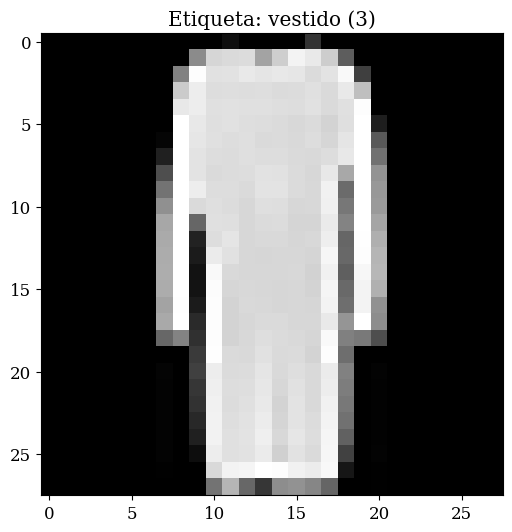

In [ ]:
# Probemos diferentes valores de `image_index` para visualizar algunas imágenes
# del set de datos:
image_index = 25

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(X[image_index].reshape(28, 28), cmap='gray')
label = y[image_index]
ax.set_title('Etiqueta: {0} ({1})'.format(classes[label], label));

In [ ]:
# Separemos los datos en 50,000 muestras de entrenamiento, 10,000 de validación
# y 10,000 de evaluación:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=20000, stratify=y, random_state=random_state
)
X_val, X_test, y_val, y_test = train_test_split(
    X_val, y_val, test_size=10000, stratify=y_val, random_state=random_state
)

# Normalicemos las caracterísitcas (los pixeles de 8 bits de profundidad tomas
# valores entre 0 y 255):
X_train = X_train/255
X_val = X_val/255
X_test = X_test/255

## Clasificación

In [ ]:
# Definamos un modelo secuencial de Keras:
model = keras.Sequential([
    keras.layers.Dense(128, input_shape=(784,), activation='tanh', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(64, activation='tanh', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(64, activation='tanh', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(32, activation='tanh', kernel_regularizer=keras.regularizers.l2(0.002)),
    keras.layers.Dense(10, activation='softmax', kernel_regularizer=keras.regularizers.l2(0.01)),
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Veamos la descripción del modelo:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 115,306 (450.41 KB)

 Trainable params: 115,306 (450.41 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compilemos el modelo con una función de pérdida, un optimizador y la accuracy
# como una métrica a seguir:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
%%time
# Entrenemos el modelo:
model.fit(
    X_train,
    y_train,
    batch_size=1024,
    epochs=100,
    validation_data=(X_val, y_val)
)

Epoch 1/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - accuracy: 0.4883 - loss: 2.2260 - val_accuracy: 0.7542 - val_loss: 1.4591
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7715 - loss: 1.3776 - val_accuracy: 0.8145 - val_loss: 1.2058
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8197 - loss: 1.1785 - val_accuracy: 0.8351 - val_loss: 1.1000
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8331 - loss: 1.0910 - val_accuracy: 0.8448 - val_loss: 1.0361
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8442 - loss: 1.0283 - val_accuracy: 0.8468 - val_loss: 0.9951
Epoch 6/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8487 - loss: 0.9880 - val_accuracy: 0.8585 - val_loss: 0.9527
Epoch 7/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8541 - loss: 0.9470 - val_accuracy: 0.8601 - val_loss: 0.9240
Epoch 8/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8591 - loss: 0.9131 - val_accuracy: 0.8642 - 

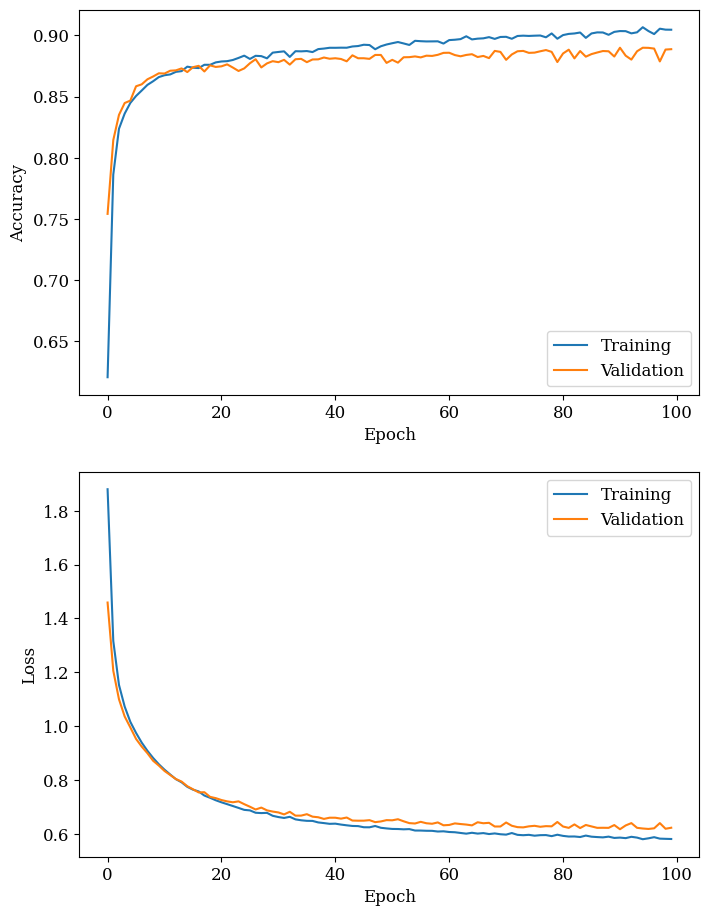

In [ ]:
# Grafiquemos la pérdida y la accuracy de entrenamiento y validación a lo largo
# de las épocas de entrenamiento:

history = model.history.history

fig, ax = plt.subplots(2, 1, figsize=(8, 11))

ax[0].set_xlabel('Epoch', size=12)
ax[0].set_ylabel('Accuracy', size=12)
ax[0].plot(history['accuracy'])
ax[0].plot(history['val_accuracy'])
ax[0].legend(['Training', 'Validation'])

ax[1].set_xlabel('Epoch', size=12)
ax[1].set_ylabel('Loss', size=12)
ax[1].plot(history['loss'])
ax[1].plot(history['val_loss'])
ax[1].legend(['Training', 'Validation']);

In [ ]:
# Hallemos la pérdida y la accuracy para el conjunto de prueba:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8737 - loss: 0.6475


[0.6360508799552917, 0.8794999718666077]

In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_pred


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([5, 2, 7, ..., 2, 2, 1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


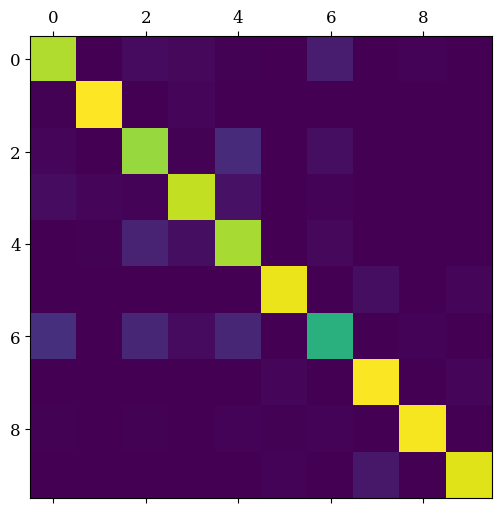

In [ ]:
# Grafiquemos la matriz de confusión para el conjunto de prueba:
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(confusion_matrix(y_test, np.argmax(model.predict(X_test), axis=-1)))

## Red Neuronal Convolucional (Extra)

Se recomienda correr el siguiente código en Google Colaboratory con la aceleración con GPU activada.

In [ ]:
conv_model = keras.Sequential([
    keras.layers.Conv2D(16, (3, 3), input_shape=(28, 28, 1), activation='tanh'),
    keras.layers.MaxPool2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='tanh', kernel_regularizer=keras.regularizers.l2(1e-5)),
    keras.layers.Dense(10, activation='softmax', kernel_regularizer=keras.regularizers.l2(1e-4))
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
conv_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2704)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │       173,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 173,930 (679.41 KB)

 Trainable params: 173,930 (679.41 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
conv_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0008),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
%%time
conv_model.fit(
    X_train.reshape(-1, 28, 28, 1),
    y_train,
    batch_size=512,
    epochs=50,
    validation_data=(X_val.reshape(-1, 28, 28, 1), y_val)
)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.6697 - loss: 1.0721 - val_accuracy: 0.8382 - val_loss: 0.4831
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8393 - loss: 0.4646 - val_accuracy: 0.8588 - val_loss: 0.4123
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8598 - loss: 0.4001 - val_accuracy: 0.8695 - val_loss: 0.3845
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8722 - loss: 0.3684 - val_accuracy: 0.8778 - val_loss: 0.3605
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8796 - loss: 0.3487 - val_accuracy: 0.8818 - val_loss: 0.3425
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8843 - loss: 0.3290 - val_accuracy: 0.8890 - val_loss: 0.3267
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8910 - loss: 0.3094 - val_accuracy: 0.8896 - val_loss: 0.3237
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8949 - loss: 0.2996 - val_accuracy: 0.8931 - val_loss

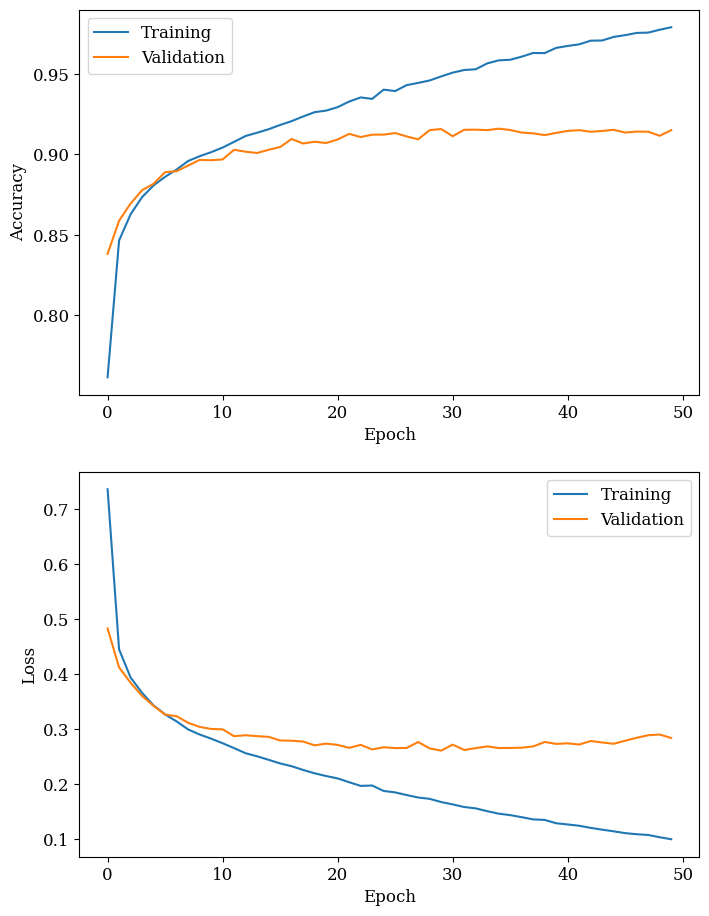

In [ ]:
history = conv_model.history.history

fig, ax = plt.subplots(2, 1, figsize=(8, 11))

ax[0].set_xlabel('Epoch', size=12)
ax[0].set_ylabel('Accuracy', size=12)
ax[0].plot(history['accuracy'])
ax[0].plot(history['val_accuracy'])
ax[0].legend(['Training', 'Validation'])

ax[1].set_xlabel('Epoch', size=12)
ax[1].set_ylabel('Loss', size=12)
ax[1].plot(history['loss'])
ax[1].plot(history['val_loss'])
ax[1].legend(['Training', 'Validation']);

In [ ]:
conv_model.evaluate(X_test.reshape(-1, 28, 28, 1), y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9089 - loss: 0.2880


[0.27553269267082214, 0.9139000177383423]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


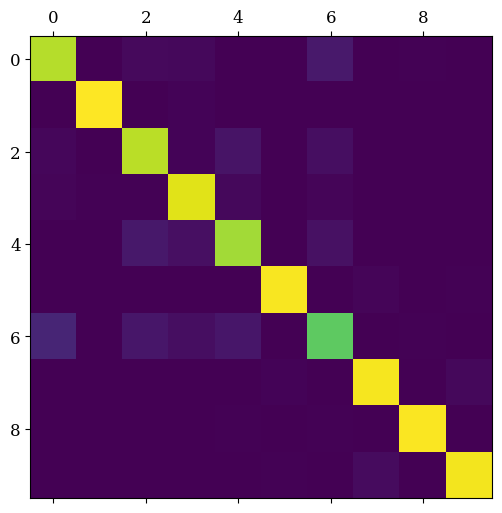

In [ ]:
# Grafiquemos la matriz de confusión para el conjunto de prueba:
fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(confusion_matrix(
    y_test,
    np.argmax(conv_model.predict(X_test.reshape(-1, 28, 28, 1)), axis=-1)
));